In [1]:
from matplotlib import pyplot as plt
import numpy as np
import tqdm
import cv2
import sc2

%pylab inline

sc2.utils.jit.enable()
sc2.utils.imageio.configurate("default_show_mode", "plt")

Populating the interactive namespace from numpy and matplotlib


# Original Image

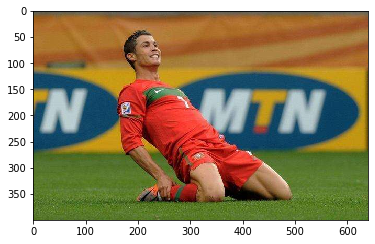

In [2]:
image = sc2.utils.image_load("messi")
sc2.utils.image_show(image)

In [3]:
backup = np.copy(image)

In [4]:
# decide how many seams to remove
steps = int(image.shape[1] * 0.3)

# Image Reducing
- **选取能量最小的一条seam进行移除**

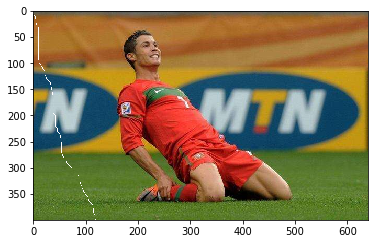

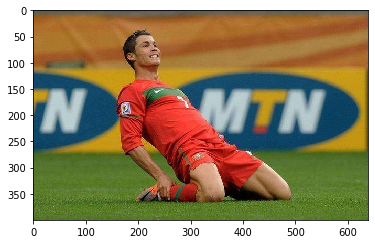

In [5]:
image = np.copy(backup)

# laplacian energy
energy = sc2.energy.laplacian(image)

# find the seam with minimum energy
seam = sc2.seamops.detect_seam(energy)
sc2.utils.image_show(sc2.seamops.image_with_seam(image, seam))

# remove the seam from image
image = sc2.seamops.remove_seam(image, seam)
sc2.utils.image_show(image)

In [6]:
# complete the remaining steps
for i in tqdm.tqdm(range(steps - 1)):
    energy = sc2.energy.laplacian(image)
    seam = sc2.seamops.detect_seam(energy)
    image = sc2.seamops.remove_seam(image, seam)

100%|██████████| 191/191 [00:05<00:00, 33.12it/s]


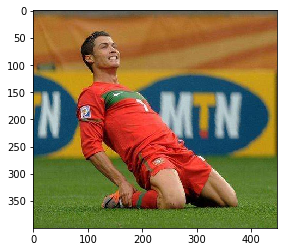

In [7]:
sc2.utils.image_show(image)

# Result of Scaling

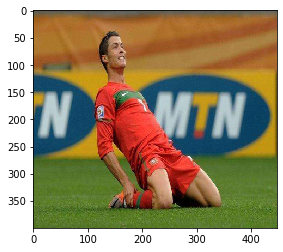

In [8]:
image = np.copy(backup)
image = cv2.resize(image, dsize=None, fx=0.7, fy=1.0)
sc2.utils.image_show(image)

### Comparation：Obviously, seam carving gain better result than scaling